In [131]:
import os
import pandas as pd
import numpy as np
#import xgboost
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.regularizers import l2
from keras.optimizers import Adam
import tensorflow as tf
from keras import layers
import keras
import utils

In [132]:



DATA_PATH = "/Users/mykola/MLHEP/Wiremind/"
raw_features = pd.read_csv(os.path.join(DATA_PATH, "ds_train.csv"))

In [133]:
all_features = utils.features_preparation(raw_features)
all_features

,current_price,days_before_departure,departure_date,direction,train_number,demand,od_destination_time_year,od_destination_time_month,od_destination_time_week,od_destination_time_day,...,od_destination_time_minute,od_origin_time_hour,od_origin_time_minute,od_time_travel,of_holiday,unof_holiday,od_destination_time_hourmin,od_origin_time_hourmin,direction_bool,date_numerical
0,100,0,2018-01-02,outbound,941,1.0,2018,1,1,2,...,41,5,17,144.0,0,0,461,317,1,2
1,100,1,2018-01-02,outbound,941,1.0,2018,1,1,2,...,41,5,17,144.0,0,0,461,317,1,2
2,100,2,2018-01-02,outbound,941,0.0,2018,1,1,2,...,41,5,17,144.0,0,0,461,317,1,2
3,100,3,2018-01-02,outbound,941,1.0,2018,1,1,2,...,41,5,17,144.0,0,0,461,317,1,2
4,100,4,2018-01-02,outbound,941,0.0,2018,1,1,2,...,41,5,17,144.0,0,0,461,317,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292645,44,25,2018-12-28,inbound,980,0.0,2018,12,52,28,...,53,21,50,123.0,0,0,1433,1310,0,362
292646,44,26,2018-12-28,inbound,980,0.0,2018,12,52,28,...,53,21,50,123.0,0,0,1433,1310,0,362
292647,44,27,2018-12-28,inbound,980,0.0,2018,12,52,28,...,53,21,50,123.0,0,0,1433,1310,0,362
292648,44,28,2018-12-28,inbound,980,0.0,2018,12,52,28,...,53,21,50,123.0,0,0,1433,1310,0,362


In [4]:
scaled_features = utils.features_scale(all_features)
scaled_features

/usr/local/lib/python3.8/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/local/lib/python3.8/site-packages/pandas/core/frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,current_price,days_before_departure,od_destination_time_month,od_destination_time_week,od_destination_time_day,od_destination_time_weekday,od_time_travel,od_destination_time_hourmin,od_origin_time_hourmin,direction_bool,demand,of_holiday,unof_holiday,date_numerical
0,0.788732,0.000000,0.0,0.0,0.033333,0.166667,0.901961,0.231013,0.224219,1,1.0,0,0,2
1,0.788732,0.034483,0.0,0.0,0.033333,0.166667,0.901961,0.231013,0.224219,1,1.0,0,0,2
2,0.788732,0.068966,0.0,0.0,0.033333,0.166667,0.901961,0.231013,0.224219,1,0.0,0,0,2
3,0.788732,0.103448,0.0,0.0,0.033333,0.166667,0.901961,0.231013,0.224219,1,1.0,0,0,2
4,0.788732,0.137931,0.0,0.0,0.033333,0.166667,0.901961,0.231013,0.224219,1,0.0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292645,0.000000,0.862069,1.0,1.0,0.900000,0.666667,0.490196,1.000000,1.000000,0,0.0,0,0,362
292646,0.000000,0.896552,1.0,1.0,0.900000,0.666667,0.490196,1.000000,1.000000,0,0.0,0,0,362
292647,0.000000,0.931034,1.0,1.0,0.900000,0.666667,0.490196,1.000000,1.000000,0,0.0,0,0,362
292648,0.000000,0.965517,1.0,1.0,0.900000,0.666667,0.490196,1.000000,1.000000,0,0.0,0,0,362


In [268]:
import tensorlayer as tl
model = Sequential()
model.add(Dense(1024, activation=lambda x : tl.act.lrelu(x, 0.2), kernel_initializer='random_normal', input_dim=12))
model.add(layers.Dropout(rate=0.3))
model.add(Dense(512, activation=lambda x : tl.act.lrelu(x, 0.2), kernel_initializer='random_normal'))
model.add(layers.Dropout(rate=0.2))
#model.add(Dense(512, activation='relu', kernel_initializer='random_normal'))
model.add(Dense(256, activation=lambda x : tl.act.lrelu(x, 0.2), kernel_initializer='random_normal'))
model.add(Dense(128, activation=lambda x : tl.act.lrelu(x, 0.2), kernel_initializer='random_normal'))
#model.add(layers.BatchNormalization())
model.add(layers.Dropout(rate=0.1))
model.add(Dense(64, activation=lambda x : tl.act.lrelu(x, 0.2), kernel_initializer='random_normal'))
#model.add(layers.BatchNormalization())
#model.add(Dense(64, activation='relu', kernel_initializer='random_normal'))
#model.add(layers.BatchNormalization())
model.add(Dense(1, activation=lambda x : tl.act.lrelu(x, 0.2), kernel_initializer='random_normal'))
#model.compile(optimizer =Adam(lr=0.001),loss=[r_square_loss], metrics =['MSE','MAE'])
model.compile(optimizer =Adam(lr=0.001),loss=['MSE'], metrics =[utils.r_square,'MAE'])

In [95]:
from keras.layers import Input
from keras.layers import Dense
from keras.models import Model
import tensorlayer as tl
main_input = Input(shape=(12,))
dense20 = Dense(512,activation='tanh')(main_input)
dpt3 = (layers.Dropout(rate=0.15))(dense20)
dense21 = Dense(256,activation='tanh')(dpt3)
bn1 = layers.BatchNormalization()(dense21)
dense22 = Dense(128,activation='tanh')(bn1)
bn2 = layers.BatchNormalization()(dense22)
dense23 = Dense(64,activation='tanh')(bn2)
bn3 = layers.BatchNormalization()(dense23)
secondary_out = Dense(1,activation=K.exp)(bn3)
secondary_out.trainable = False



In [76]:
train_part, validation = train_test_split(scaled_features, test_size=0.2, shuffle=True, random_state=342343234)
print(train_part.shape)
print(validation.shape)
validation.demand

(234120, 14)
(58530, 14)


69580     0.0
49753     0.0
2702      1.0
98526     0.0
109822    2.0
         ... 
128419    0.0
270933    0.0
292252    0.0
247226    0.0
205700    0.0
Name: demand, Length: 58530, dtype: float64

In [96]:
model = Model(inputs=[main_input],outputs=[secondary_out])
from keras import backend as K
def poisson(y_true, y_pred): 
    return K.mean(K.maximum(.0, y_pred) - y_true * K.log(K.maximum(.0, y_pred) + K.epsilon()), axis=-1)
#    return K.mean(y_pred - y_true * K.log(y_pred + K.epsilon()), axis=-1)
def poisson_loss(y_true, y_pred):
    y_pred = tf.cast(y_pred, tf.float32)
    y_true = tf.cast(y_true, tf.float32)
    return tf.reduce_mean(y_pred - y_true*tf.math.log(y_pred+1e-10) + \
                          tf.math.lgamma(y_true+1.0))
m = tf.keras.losses.poisson

save_all_xy = keras.callbacks.ModelCheckpoint("NNmodels/"+'weights.{epoch:02d}-{val_loss:.5f}.h5', monitor='val_loss', verbose=1, save_best_only=False, save_weights_only=False, mode='auto', period=1)
model.compile(loss=[poisson_loss], metrics=["MAE","MSE"] ,optimizer=Adam(lr=0.001),loss_weights=[1])
history = model.fit(train_part.loc[:,utils.input_features].values,train_part.demand, verbose=1, callbacks=[save_all_xy], validation_data=(validation.loc[:,utils.input_features].values, validation.demand), shuffle=True, batch_size=150, epochs=1100)


Epoch 1/1100
1560/1561 [============================>.] - ETA: 0s - loss: 1.4954 - MAE: 1.2376 - MSE: 7.5490
Epoch 00001: saving model to NNmodels/weights.01-1.34267.h5
1561/1561 [==============================] - 31s 20ms/step - loss: 1.4953 - MAE: 1.2375 - MSE: 7.5469 - val_loss: 1.3427 - val_MAE: 1.1477 - val_MSE: 6.6696
Epoch 2/1100
1560/1561 [============================>.] - ETA: 0s - loss: 1.3193 - MAE: 1.0779 - MSE: 5.1847
Epoch 00002: saving model to NNmodels/weights.02-1.28381.h5
1561/1561 [==============================] - 34s 22ms/step - loss: 1.3192 - MAE: 1.0779 - MSE: 5.1836 - val_loss: 1.2838 - val_MAE: 1.0786 - val_MSE: 5.4982
Epoch 3/1100
1559/1561 [============================>.] - ETA: 0s - loss: 1.2965 - MAE: 1.0506 - MSE: 4.8349
Epoch 00003: saving model to NNmodels/weights.03-1.26883.h5
1561/1561 [==============================] - 33s 21ms/step - loss: 1.2965 - MAE: 1.0506 - MSE: 4.8338 - val_loss: 1.2688 - val_MAE: 1.0519 - val_MSE: 4.9230
Epoch 4/1100
1561/1561

Epoch 26/1100
1560/1561 [============================>.] - ETA: 0s - loss: 1.1964 - MAE: 0.9460 - MSE: 3.6408
Epoch 00026: saving model to NNmodels/weights.26-1.18203.h5
1561/1561 [==============================] - 46s 30ms/step - loss: 1.1964 - MAE: 0.9460 - MSE: 3.6398 - val_loss: 1.1820 - val_MAE: 0.9348 - val_MSE: 3.6374
Epoch 27/1100
1561/1561 [==============================] - ETA: 0s - loss: 1.1983 - MAE: 0.9482 - MSE: 3.6782
Epoch 00027: saving model to NNmodels/weights.27-1.17804.h5
1561/1561 [==============================] - 48s 31ms/step - loss: 1.1983 - MAE: 0.9482 - MSE: 3.6782 - val_loss: 1.1780 - val_MAE: 0.9271 - val_MSE: 3.4270
Epoch 28/1100
1560/1561 [============================>.] - ETA: 0s - loss: 1.1927 - MAE: 0.9429 - MSE: 3.6251
Epoch 00028: saving model to NNmodels/weights.28-1.18112.h5
1561/1561 [==============================] - 46s 29ms/step - loss: 1.1927 - MAE: 0.9429 - MSE: 3.6241 - val_loss: 1.1811 - val_MAE: 0.9320 - val_MSE: 3.5991
Epoch 29/1100
1560/

Epoch 51/1100
1560/1561 [============================>.] - ETA: 0s - loss: 1.1660 - MAE: 0.9153 - MSE: 3.3199
Epoch 00051: saving model to NNmodels/weights.51-1.17022.h5
1561/1561 [==============================] - 44s 28ms/step - loss: 1.1660 - MAE: 0.9152 - MSE: 3.3193 - val_loss: 1.1702 - val_MAE: 0.9144 - val_MSE: 3.7847
Epoch 52/1100
1559/1561 [============================>.] - ETA: 0s - loss: 1.1674 - MAE: 0.9166 - MSE: 3.3596
Epoch 00052: saving model to NNmodels/weights.52-1.17453.h5
1561/1561 [==============================] - 44s 28ms/step - loss: 1.1674 - MAE: 0.9166 - MSE: 3.3586 - val_loss: 1.1745 - val_MAE: 0.9158 - val_MSE: 4.9765
Epoch 53/1100
1561/1561 [==============================] - ETA: 0s - loss: 1.1641 - MAE: 0.9144 - MSE: 3.3268
Epoch 00053: saving model to NNmodels/weights.53-1.17729.h5
1561/1561 [==============================] - 44s 28ms/step - loss: 1.1641 - MAE: 0.9144 - MSE: 3.3268 - val_loss: 1.1773 - val_MAE: 0.9196 - val_MSE: 5.7984
Epoch 54/1100
1561/

Epoch 101/1100
1559/1561 [============================>.] - ETA: 0s - loss: 1.1296 - MAE: 0.8788 - MSE: 2.9230
Epoch 00101: saving model to NNmodels/weights.101-1.17078.h5
1561/1561 [==============================] - 43s 28ms/step - loss: 1.1296 - MAE: 0.8789 - MSE: 2.9230 - val_loss: 1.1708 - val_MAE: 0.9002 - val_MSE: 6.4221
Epoch 102/1100
1560/1561 [============================>.] - ETA: 0s - loss: 1.1294 - MAE: 0.8793 - MSE: 2.9596
Epoch 00102: saving model to NNmodels/weights.102-1.16712.h5
1561/1561 [==============================] - 43s 28ms/step - loss: 1.1294 - MAE: 0.8792 - MSE: 2.9590 - val_loss: 1.1671 - val_MAE: 0.8962 - val_MSE: 3.8229
Epoch 103/1100
1559/1561 [============================>.] - ETA: 0s - loss: 1.1297 - MAE: 0.8791 - MSE: 2.9640
Epoch 00103: saving model to NNmodels/weights.103-1.18320.h5
1561/1561 [==============================] - 43s 27ms/step - loss: 1.1297 - MAE: 0.8791 - MSE: 2.9633 - val_loss: 1.1832 - val_MAE: 0.9052 - val_MSE: 9.5054
Epoch 104/110

Epoch 126/1100
1559/1561 [============================>.] - ETA: 0s - loss: 1.1148 - MAE: 0.8648 - MSE: 2.7867
Epoch 00126: saving model to NNmodels/weights.126-1.20095.h5
1561/1561 [==============================] - 34s 22ms/step - loss: 1.1148 - MAE: 0.8648 - MSE: 2.7863 - val_loss: 1.2009 - val_MAE: 0.9240 - val_MSE: 35.4582
Epoch 127/1100
1560/1561 [============================>.] - ETA: 0s - loss: 1.1169 - MAE: 0.8673 - MSE: 2.8351
Epoch 00127: saving model to NNmodels/weights.127-1.22643.h5
1561/1561 [==============================] - 35s 22ms/step - loss: 1.1169 - MAE: 0.8673 - MSE: 2.8346 - val_loss: 1.2264 - val_MAE: 0.9457 - val_MSE: 83.9982
Epoch 128/1100
1561/1561 [==============================] - ETA: 0s - loss: 1.1142 - MAE: 0.8645 - MSE: 2.7948
Epoch 00128: saving model to NNmodels/weights.128-1.18456.h5
1561/1561 [==============================] - 34s 22ms/step - loss: 1.1142 - MAE: 0.8645 - MSE: 2.7948 - val_loss: 1.1846 - val_MAE: 0.8983 - val_MSE: 7.5139
Epoch 129/1

Epoch 151/1100
1560/1561 [============================>.] - ETA: 0s - loss: 1.1018 - MAE: 0.8523 - MSE: 2.6746
Epoch 00151: saving model to NNmodels/weights.151-1.21743.h5
1561/1561 [==============================] - 34s 22ms/step - loss: 1.1018 - MAE: 0.8522 - MSE: 2.6742 - val_loss: 1.2174 - val_MAE: 0.9445 - val_MSE: 79.1631
Epoch 152/1100
1561/1561 [==============================] - ETA: 0s - loss: 1.1002 - MAE: 0.8499 - MSE: 2.6393
Epoch 00152: saving model to NNmodels/weights.152-1.19652.h5
1561/1561 [==============================] - 34s 22ms/step - loss: 1.1002 - MAE: 0.8499 - MSE: 2.6393 - val_loss: 1.1965 - val_MAE: 0.9186 - val_MSE: 28.7881
Epoch 153/1100
1561/1561 [==============================] - ETA: 0s - loss: 1.1000 - MAE: 0.8489 - MSE: 2.6433
Epoch 00153: saving model to NNmodels/weights.153-1.19771.h5
1561/1561 [==============================] - 34s 22ms/step - loss: 1.1000 - MAE: 0.8489 - MSE: 2.6433 - val_loss: 1.1977 - val_MAE: 0.9044 - val_MSE: 19.4088
Epoch 154/

Epoch 176/1100
1559/1561 [============================>.] - ETA: 0s - loss: 1.0850 - MAE: 0.8351 - MSE: 2.5338
Epoch 00176: saving model to NNmodels/weights.176-1.37940.h5
1561/1561 [==============================] - 34s 22ms/step - loss: 1.0851 - MAE: 0.8351 - MSE: 2.5336 - val_loss: 1.3794 - val_MAE: 1.0915 - val_MSE: 741.4952
Epoch 177/1100
1561/1561 [==============================] - ETA: 0s - loss: 1.0864 - MAE: 0.8353 - MSE: 2.5229
Epoch 00177: saving model to NNmodels/weights.177-1.56652.h5
1561/1561 [==============================] - 34s 22ms/step - loss: 1.0864 - MAE: 0.8353 - MSE: 2.5229 - val_loss: 1.5665 - val_MAE: 1.2825 - val_MSE: 3672.8364
Epoch 178/1100
1559/1561 [============================>.] - ETA: 0s - loss: 1.0846 - MAE: 0.8335 - MSE: 2.4995
Epoch 00178: saving model to NNmodels/weights.178-1.30967.h5
1561/1561 [==============================] - 36s 23ms/step - loss: 1.0847 - MAE: 0.8336 - MSE: 2.4998 - val_loss: 1.3097 - val_MAE: 1.0277 - val_MSE: 301.2786
Epoch 

Epoch 201/1100
1559/1561 [============================>.] - ETA: 0s - loss: 1.0702 - MAE: 0.8209 - MSE: 2.4021
Epoch 00201: saving model to NNmodels/weights.201-1.39954.h5
1561/1561 [==============================] - 34s 22ms/step - loss: 1.0703 - MAE: 0.8210 - MSE: 2.4018 - val_loss: 1.3995 - val_MAE: 1.1119 - val_MSE: 1599.3660
Epoch 202/1100
1559/1561 [============================>.] - ETA: 0s - loss: 1.0715 - MAE: 0.8232 - MSE: 2.4480
Epoch 00202: saving model to NNmodels/weights.202-1.26494.h5
1561/1561 [==============================] - 34s 22ms/step - loss: 1.0715 - MAE: 0.8232 - MSE: 2.4478 - val_loss: 1.2649 - val_MAE: 0.9758 - val_MSE: 120.6600
Epoch 203/1100
1561/1561 [==============================] - ETA: 0s - loss: 1.0703 - MAE: 0.8223 - MSE: 2.4484
Epoch 00203: saving model to NNmodels/weights.203-2.59042.h5
1561/1561 [==============================] - 34s 22ms/step - loss: 1.0703 - MAE: 0.8223 - MSE: 2.4484 - val_loss: 2.5904 - val_MAE: 2.3002 - val_MSE: 55828.0078
Epoc

Epoch 226/1100
1559/1561 [============================>.] - ETA: 0s - loss: 1.0570 - MAE: 0.8093 - MSE: 2.3938
Epoch 00226: saving model to NNmodels/weights.226-1.43599.h5
1561/1561 [==============================] - 35s 22ms/step - loss: 1.0571 - MAE: 0.8093 - MSE: 2.3936 - val_loss: 1.4360 - val_MAE: 1.1379 - val_MSE: 1356.6555
Epoch 227/1100
1560/1561 [============================>.] - ETA: 0s - loss: 1.0545 - MAE: 0.8054 - MSE: 2.3122
Epoch 00227: saving model to NNmodels/weights.227-1.22875.h5
1561/1561 [==============================] - 34s 22ms/step - loss: 1.0545 - MAE: 0.8053 - MSE: 2.3119 - val_loss: 1.2288 - val_MAE: 0.9380 - val_MSE: 46.2701
Epoch 228/1100
1561/1561 [==============================] - ETA: 0s - loss: 1.0585 - MAE: 0.8085 - MSE: 2.3376
Epoch 00228: saving model to NNmodels/weights.228-1.23086.h5
1561/1561 [==============================] - 34s 22ms/step - loss: 1.0585 - MAE: 0.8085 - MSE: 2.3376 - val_loss: 1.2309 - val_MAE: 0.9453 - val_MSE: 69.2285
Epoch 22

Epoch 251/1100
1560/1561 [============================>.] - ETA: 0s - loss: 1.0426 - MAE: 0.7948 - MSE: 2.2427
Epoch 00251: saving model to NNmodels/weights.251-1.37040.h5
1561/1561 [==============================] - 35s 22ms/step - loss: 1.0426 - MAE: 0.7948 - MSE: 2.2422 - val_loss: 1.3704 - val_MAE: 1.0738 - val_MSE: 765.1182
Epoch 252/1100
1559/1561 [============================>.] - ETA: 0s - loss: 1.0402 - MAE: 0.7927 - MSE: 2.2367
Epoch 00252: saving model to NNmodels/weights.252-2.01271.h5
1561/1561 [==============================] - 36s 23ms/step - loss: 1.0403 - MAE: 0.7927 - MSE: 2.2364 - val_loss: 2.0127 - val_MAE: 1.7271 - val_MSE: 16668.6309
Epoch 253/1100
1560/1561 [============================>.] - ETA: 0s - loss: 1.0396 - MAE: 0.7927 - MSE: 2.2464
Epoch 00253: saving model to NNmodels/weights.253-1.57769.h5
1561/1561 [==============================] - 35s 22ms/step - loss: 1.0396 - MAE: 0.7927 - MSE: 2.2461 - val_loss: 1.5777 - val_MAE: 1.2769 - val_MSE: 2198.6035
Epoc

Epoch 276/1100
1560/1561 [============================>.] - ETA: 0s - loss: 1.0267 - MAE: 0.7796 - MSE: 2.1557
Epoch 00276: saving model to NNmodels/weights.276-1.32379.h5
1561/1561 [==============================] - 34s 22ms/step - loss: 1.0267 - MAE: 0.7796 - MSE: 2.1552 - val_loss: 1.3238 - val_MAE: 1.0311 - val_MSE: 289.0505
Epoch 277/1100
1561/1561 [==============================] - ETA: 0s - loss: 1.0280 - MAE: 0.7829 - MSE: 2.1785
Epoch 00277: saving model to NNmodels/weights.277-10321159782400.00000.h5
1561/1561 [==============================] - 34s 22ms/step - loss: 1.0280 - MAE: 0.7829 - MSE: 2.1785 - val_loss: 10321159782400.0000 - val_MAE: 10321159782400.0000 - val_MSE: 6230905224062646395286306422784.0000
Epoch 278/1100
1561/1561 [==============================] - ETA: 0s - loss: 1.0258 - MAE: 0.7794 - MSE: 2.1565
Epoch 00278: saving model to NNmodels/weights.278-1.85293.h5
1561/1561 [==============================] - 34s 22ms/step - loss: 1.0258 - MAE: 0.7794 - MSE: 2.15

Epoch 301/1100
1560/1561 [============================>.] - ETA: 0s - loss: 1.0147 - MAE: 0.7716 - MSE: 2.1355
Epoch 00301: saving model to NNmodels/weights.301-1.71179.h5
1561/1561 [==============================] - 34s 22ms/step - loss: 1.0148 - MAE: 0.7716 - MSE: 2.1351 - val_loss: 1.7118 - val_MAE: 1.4081 - val_MSE: 9445.9414
Epoch 302/1100
1560/1561 [============================>.] - ETA: 0s - loss: 1.0139 - MAE: 0.7691 - MSE: 2.0999
Epoch 00302: saving model to NNmodels/weights.302-1.34425.h5
1561/1561 [==============================] - 34s 22ms/step - loss: 1.0139 - MAE: 0.7691 - MSE: 2.0993 - val_loss: 1.3442 - val_MAE: 1.0499 - val_MSE: 298.6018
Epoch 303/1100
1559/1561 [============================>.] - ETA: 0s - loss: 1.0126 - MAE: 0.7688 - MSE: 2.1053
Epoch 00303: saving model to NNmodels/weights.303-1.21960.h5
1561/1561 [==============================] - 34s 22ms/step - loss: 1.0127 - MAE: 0.7688 - MSE: 2.1048 - val_loss: 1.2196 - val_MAE: 0.9171 - val_MSE: 11.2793
Epoch 3

Epoch 326/1100
1559/1561 [============================>.] - ETA: 0s - loss: 1.0016 - MAE: 0.7595 - MSE: 2.0629
Epoch 00326: saving model to NNmodels/weights.326-1.31761.h5
1561/1561 [==============================] - 34s 22ms/step - loss: 1.0016 - MAE: 0.7596 - MSE: 2.0625 - val_loss: 1.3176 - val_MAE: 1.0054 - val_MSE: 311.5232
Epoch 327/1100
1560/1561 [============================>.] - ETA: 0s - loss: 1.0008 - MAE: 0.7589 - MSE: 2.0509
Epoch 00327: saving model to NNmodels/weights.327-1.73087.h5
1561/1561 [==============================] - 35s 22ms/step - loss: 1.0008 - MAE: 0.7588 - MSE: 2.0503 - val_loss: 1.7309 - val_MAE: 1.4292 - val_MSE: 9412.0508
Epoch 328/1100
1561/1561 [==============================] - ETA: 0s - loss: 1.0008 - MAE: 0.7587 - MSE: 2.0428
Epoch 00328: saving model to NNmodels/weights.328-1.70268.h5
1561/1561 [==============================] - 34s 22ms/step - loss: 1.0008 - MAE: 0.7587 - MSE: 2.0428 - val_loss: 1.7027 - val_MAE: 1.4009 - val_MSE: 5406.8096
Epoch

Epoch 351/1100
1559/1561 [============================>.] - ETA: 0s - loss: 0.9912 - MAE: 0.7497 - MSE: 2.0065
Epoch 00351: saving model to NNmodels/weights.351-1.84785.h5
1561/1561 [==============================] - 34s 22ms/step - loss: 0.9912 - MAE: 0.7496 - MSE: 2.0060 - val_loss: 1.8478 - val_MAE: 1.5302 - val_MSE: 12063.6562
Epoch 352/1100
1559/1561 [============================>.] - ETA: 0s - loss: 0.9909 - MAE: 0.7490 - MSE: 1.9894
Epoch 00352: saving model to NNmodels/weights.352-1.29123.h5
1561/1561 [==============================] - 34s 22ms/step - loss: 0.9910 - MAE: 0.7489 - MSE: 1.9890 - val_loss: 1.2912 - val_MAE: 0.9942 - val_MSE: 152.2776
Epoch 353/1100
1561/1561 [==============================] - ETA: 0s - loss: 0.9901 - MAE: 0.7490 - MSE: 2.0028
Epoch 00353: saving model to NNmodels/weights.353-1.28576.h5
1561/1561 [==============================] - 34s 22ms/step - loss: 0.9901 - MAE: 0.7490 - MSE: 2.0028 - val_loss: 1.2858 - val_MAE: 0.9859 - val_MSE: 122.6438
Epoch

Epoch 376/1100
1560/1561 [============================>.] - ETA: 0s - loss: 0.9813 - MAE: 0.7392 - MSE: 1.9317
Epoch 00376: saving model to NNmodels/weights.376-1.26683.h5
1561/1561 [==============================] - 34s 22ms/step - loss: 0.9813 - MAE: 0.7391 - MSE: 1.9312 - val_loss: 1.2668 - val_MAE: 0.9674 - val_MSE: 121.3644
Epoch 377/1100
1560/1561 [============================>.] - ETA: 0s - loss: 0.9800 - MAE: 0.7389 - MSE: 1.9464
Epoch 00377: saving model to NNmodels/weights.377-1.25055.h5
1561/1561 [==============================] - 34s 22ms/step - loss: 0.9800 - MAE: 0.7388 - MSE: 1.9459 - val_loss: 1.2505 - val_MAE: 0.9531 - val_MSE: 34.9854
Epoch 378/1100
1561/1561 [==============================] - ETA: 0s - loss: 0.9788 - MAE: 0.7380 - MSE: 1.9376
Epoch 00378: saving model to NNmodels/weights.378-1.21789.h5
1561/1561 [==============================] - 35s 22ms/step - loss: 0.9788 - MAE: 0.7380 - MSE: 1.9376 - val_loss: 1.2179 - val_MAE: 0.9182 - val_MSE: 7.3576
Epoch 379/

Epoch 401/1100
1560/1561 [============================>.] - ETA: 0s - loss: 0.9711 - MAE: 0.7317 - MSE: 1.9166
Epoch 00401: saving model to NNmodels/weights.401-1.22540.h5
1561/1561 [==============================] - 34s 22ms/step - loss: 0.9711 - MAE: 0.7317 - MSE: 1.9162 - val_loss: 1.2254 - val_MAE: 0.9190 - val_MSE: 9.2779
Epoch 402/1100
1561/1561 [==============================] - ETA: 0s - loss: 0.9720 - MAE: 0.7349 - MSE: 1.9694
Epoch 00402: saving model to NNmodels/weights.402-1.32457.h5
1561/1561 [==============================] - 34s 22ms/step - loss: 0.9720 - MAE: 0.7349 - MSE: 1.9694 - val_loss: 1.3246 - val_MAE: 1.0128 - val_MSE: 451.5027
Epoch 403/1100
1560/1561 [============================>.] - ETA: 0s - loss: 0.9697 - MAE: 0.7315 - MSE: 1.9276
Epoch 00403: saving model to NNmodels/weights.403-1.25632.h5
1561/1561 [==============================] - 34s 22ms/step - loss: 0.9697 - MAE: 0.7314 - MSE: 1.9271 - val_loss: 1.2563 - val_MAE: 0.9507 - val_MSE: 60.4649
Epoch 404/

Epoch 426/1100
1561/1561 [==============================] - ETA: 0s - loss: 0.9640 - MAE: 0.7261 - MSE: 1.9048
Epoch 00426: saving model to NNmodels/weights.426-1.24560.h5
1561/1561 [==============================] - 35s 22ms/step - loss: 0.9640 - MAE: 0.7261 - MSE: 1.9048 - val_loss: 1.2456 - val_MAE: 0.9612 - val_MSE: 41.2778
Epoch 427/1100
1559/1561 [============================>.] - ETA: 0s - loss: 0.9615 - MAE: 0.7245 - MSE: 1.8701
Epoch 00427: saving model to NNmodels/weights.427-1.23734.h5
1561/1561 [==============================] - 34s 22ms/step - loss: 0.9616 - MAE: 0.7245 - MSE: 1.8698 - val_loss: 1.2373 - val_MAE: 0.9420 - val_MSE: 16.1961
Epoch 428/1100
1560/1561 [============================>.] - ETA: 0s - loss: 0.9619 - MAE: 0.7257 - MSE: 1.9202
Epoch 00428: saving model to NNmodels/weights.428-1.21891.h5
1561/1561 [==============================] - 35s 22ms/step - loss: 0.9619 - MAE: 0.7257 - MSE: 1.9199 - val_loss: 1.2189 - val_MAE: 0.9336 - val_MSE: 8.1192
Epoch 429/1

Epoch 451/1100
1560/1561 [============================>.] - ETA: 0s - loss: 0.9547 - MAE: 0.7175 - MSE: 1.8814
Epoch 00451: saving model to NNmodels/weights.451-1.22585.h5
1561/1561 [==============================] - 34s 22ms/step - loss: 0.9547 - MAE: 0.7174 - MSE: 1.8810 - val_loss: 1.2258 - val_MAE: 0.9193 - val_MSE: 6.9981
Epoch 452/1100
1560/1561 [============================>.] - ETA: 0s - loss: 0.9555 - MAE: 0.7184 - MSE: 1.8838
Epoch 00452: saving model to NNmodels/weights.452-1.22273.h5
1561/1561 [==============================] - 34s 22ms/step - loss: 0.9555 - MAE: 0.7184 - MSE: 1.8833 - val_loss: 1.2227 - val_MAE: 0.9200 - val_MSE: 6.8368
Epoch 453/1100
1559/1561 [============================>.] - ETA: 0s - loss: 0.9564 - MAE: 0.7188 - MSE: 1.8746
Epoch 00453: saving model to NNmodels/weights.453-1.22549.h5
1561/1561 [==============================] - 34s 22ms/step - loss: 0.9564 - MAE: 0.7188 - MSE: 1.8741 - val_loss: 1.2255 - val_MAE: 0.9188 - val_MSE: 5.3612
Epoch 454/110

Epoch 476/1100
1561/1561 [==============================] - ETA: 0s - loss: 0.9471 - MAE: 0.7111 - MSE: 1.8376
Epoch 00476: saving model to NNmodels/weights.476-1.38164.h5
1561/1561 [==============================] - 34s 22ms/step - loss: 0.9471 - MAE: 0.7111 - MSE: 1.8376 - val_loss: 1.3816 - val_MAE: 1.0663 - val_MSE: 713.6067
Epoch 477/1100
1561/1561 [==============================] - ETA: 0s - loss: 0.9517 - MAE: 0.7154 - MSE: 1.8777
Epoch 00477: saving model to NNmodels/weights.477-1.39957.h5
1561/1561 [==============================] - 34s 22ms/step - loss: 0.9517 - MAE: 0.7154 - MSE: 1.8777 - val_loss: 1.3996 - val_MAE: 1.0763 - val_MSE: 814.5823
Epoch 478/1100
1561/1561 [==============================] - ETA: 0s - loss: 0.9470 - MAE: 0.7098 - MSE: 1.8155
Epoch 00478: saving model to NNmodels/weights.478-1.84717.h5
1561/1561 [==============================] - 36s 23ms/step - loss: 0.9470 - MAE: 0.7098 - MSE: 1.8155 - val_loss: 1.8472 - val_MAE: 1.5378 - val_MSE: 15398.1807
Epoch

Epoch 501/1100
1559/1561 [============================>.] - ETA: 0s - loss: 0.9418 - MAE: 0.7054 - MSE: 1.8008
Epoch 00501: saving model to NNmodels/weights.501-1.36211.h5
1561/1561 [==============================] - 34s 22ms/step - loss: 0.9419 - MAE: 0.7054 - MSE: 1.8004 - val_loss: 1.3621 - val_MAE: 1.0375 - val_MSE: 814.5325
Epoch 502/1100
1559/1561 [============================>.] - ETA: 0s - loss: 0.9407 - MAE: 0.7042 - MSE: 1.7745
Epoch 00502: saving model to NNmodels/weights.502-1.35821.h5
1561/1561 [==============================] - 34s 22ms/step - loss: 0.9407 - MAE: 0.7042 - MSE: 1.7749 - val_loss: 1.3582 - val_MAE: 1.0324 - val_MSE: 323.8493
Epoch 503/1100
1560/1561 [============================>.] - ETA: 0s - loss: 0.9414 - MAE: 0.7050 - MSE: 1.7942
Epoch 00503: saving model to NNmodels/weights.503-1.32353.h5
1561/1561 [==============================] - 34s 22ms/step - loss: 0.9415 - MAE: 0.7050 - MSE: 1.7937 - val_loss: 1.3235 - val_MAE: 1.0098 - val_MSE: 318.4407
Epoch 5

Epoch 526/1100
1559/1561 [============================>.] - ETA: 0s - loss: 0.9345 - MAE: 0.6998 - MSE: 1.7784
Epoch 00526: saving model to NNmodels/weights.526-1.23377.h5
1561/1561 [==============================] - 35s 22ms/step - loss: 0.9346 - MAE: 0.6998 - MSE: 1.7781 - val_loss: 1.2338 - val_MAE: 0.9098 - val_MSE: 3.7726
Epoch 527/1100
1559/1561 [============================>.] - ETA: 0s - loss: 0.9343 - MAE: 0.6990 - MSE: 1.7863
Epoch 00527: saving model to NNmodels/weights.527-1.24277.h5
1561/1561 [==============================] - 34s 22ms/step - loss: 0.9344 - MAE: 0.6990 - MSE: 1.7859 - val_loss: 1.2428 - val_MAE: 0.9321 - val_MSE: 8.6695
Epoch 528/1100
1560/1561 [============================>.] - ETA: 0s - loss: 0.9377 - MAE: 0.7026 - MSE: 1.8181
Epoch 00528: saving model to NNmodels/weights.528-1.23295.h5
1561/1561 [==============================] - 34s 22ms/step - loss: 0.9377 - MAE: 0.7026 - MSE: 1.8177 - val_loss: 1.2329 - val_MAE: 0.9108 - val_MSE: 4.2770
Epoch 529/110

Epoch 551/1100
1561/1561 [==============================] - ETA: 0s - loss: 0.9324 - MAE: 0.6972 - MSE: 1.7844
Epoch 00551: saving model to NNmodels/weights.551-1.27432.h5
1561/1561 [==============================] - 35s 22ms/step - loss: 0.9324 - MAE: 0.6972 - MSE: 1.7844 - val_loss: 1.2743 - val_MAE: 0.9408 - val_MSE: 34.4900
Epoch 552/1100
1561/1561 [==============================] - ETA: 0s - loss: 0.9339 - MAE: 0.6979 - MSE: 1.7649
Epoch 00552: saving model to NNmodels/weights.552-1.27806.h5
1561/1561 [==============================] - 34s 22ms/step - loss: 0.9339 - MAE: 0.6979 - MSE: 1.7649 - val_loss: 1.2781 - val_MAE: 0.9241 - val_MSE: 37.2384
Epoch 553/1100
1559/1561 [============================>.] - ETA: 0s - loss: 0.9348 - MAE: 0.6988 - MSE: 1.7883
Epoch 00553: saving model to NNmodels/weights.553-1.27757.h5
1561/1561 [==============================] - 34s 22ms/step - loss: 0.9348 - MAE: 0.6987 - MSE: 1.7876 - val_loss: 1.2776 - val_MAE: 0.9493 - val_MSE: 58.3799
Epoch 554/

KeyboardInterrupt: 

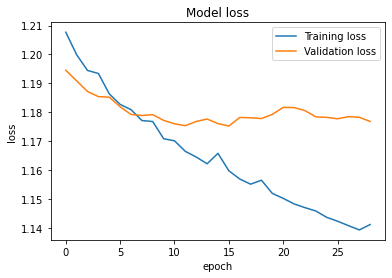

In [110]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Training loss', 'Validation loss'], loc='upper right')
plt.savefig("loss.png")
plt.show()

In [127]:
from keras.models import load_model

def r_square(y_true, y_pred):
    from keras import backend as K
    SS_res =  K.sum(K.square(y_true - y_pred)) 
    SS_tot = K.sum(K.square(y_true - K.mean(y_true))) 
    return (1 - SS_res/(SS_tot + K.epsilon()))

def poisson_loss(y_true, y_pred):
    y_pred = tf.cast(y_pred, tf.float32)
    y_true = tf.cast(y_true, tf.float32)
    return tf.reduce_mean(y_pred - y_true*tf.math.log(y_pred+1e-10) + \
                          tf.math.lgamma(y_true+1.0))

model = load_model("/Users/mykola/MLHEP/Wiremind/NNModels/weights.85-1.15921.h5", custom_objects={'<lambda>': lambda x : tl.act.lrelu(x, 0.2),"r_square":r_square,"exp":K.exp,"poisson_loss":poisson_loss})
prediction_validation = np.array(model.predict(validation.loc[:, utils.input_features].values),dtype=float)

In [128]:
k = np.floor(prediction_validation).astype(np.int)
np.unique(k)
#validation.demand.unique


array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 39, 43, 46, 51, 53, 61])

In [251]:
first = prediction_validation
first.flatten().shape
second = prediction_validation

In [252]:
#validation.shape
prediction_validation.shape
#validation.loc[:,"nn_demand"] = np.rint(prediction_validation.flatten())
#validation[25:50]
#prediction_validation

(58530, 1)

In [129]:
#1.25*np.rint(prediction_validation)[:50]
print(abs(np.rint(k.flatten()) - np.array(validation.demand)).sum())
#np.rint(prediction_validation)[:50]
#np.mean(validation.current_price*abs(np.rint(first.flatten()) - np.array(validation.demand)))


45139.0


In [130]:
np.mean(abs(np.rint(k.flatten()) - np.array(validation.demand)))
#np.mean((np.rint(k.flatten()) - np.array(validation.demand))**2)


0.771211344609602

In [445]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
x = np.random.randint(1, 100, 5000)
x
#plt.hist(x, bins=20)
#plt.ylabel('No of times')
#plt.show()

array([36, 85, 51, ..., 54, 58, 21])

In [228]:
all_features[all_features.od_destination_time_weekday.eq(1)].demand.sum()

47836.0

In [495]:
dem_weekday = [all_features[all_features.od_destination_time_weekday.eq(x)].demand.sum() for x in all_features.od_destination_time_weekday.unique()]
dem_weekday

[47836.0, 51640.0, 56415.0, 75985.0, 44189.0, 59877.0, 59768.0]

In [502]:
dem_daysbefore = [all_features[all_features.days_before_departure.eq(x)].demand.sum() for x in all_features.days_before_departure.unique()]
dem_daysbefore

[128910.0,
 71994.0,
 29729.0,
 22823.0,
 18193.0,
 14955.0,
 12845.0,
 11473.0,
 9278.0,
 7570.0,
 6572.0,
 5701.0,
 4991.0,
 4829.0,
 4788.0,
 4409.0,
 3938.0,
 3582.0,
 3376.0,
 3074.0,
 2984.0,
 2867.0,
 2666.0,
 2417.0,
 2438.0,
 1943.0,
 1951.0,
 1843.0,
 1828.0,
 1743.0]

In [485]:
dem_date = [all_features[all_features.date_numerical.eq(x)].demand.sum() for x in all_features.date_numerical.unique()]
len(dem_date)

365

[47836.0, 51640.0, 56415.0, 75985.0, 44189.0, 59877.0, 59768.0]


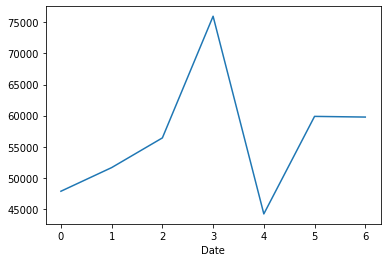

In [499]:
print(dem_weekday)
plt.plot(range(0,len(dem_weekday)),dem_weekday)
plt.xlabel('Date')
plt.show()

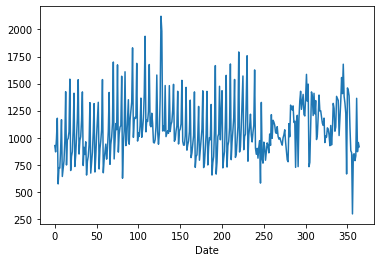

In [500]:
import matplotlib.pyplot as plt
plt.plot(range(0,len(dem_date)),dem_date)
plt.xlabel('Date')
plt.show()


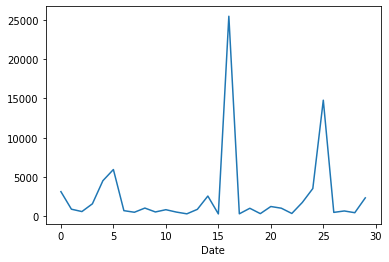

In [228]:
dem_daysbefore_val = [validation[validation.days_before_departure.eq(x)].demand.sum() for x in validation.days_before_departure.unique()]
dem_daysbefore_nn = [validation[validation.days_before_departure.eq(x)].nn_demand.sum() for x in validation.days_before_departure.unique()]
all_ = [validation[validation.days_before_departure.eq(x)].nn_demand.sum() for x in validation.days_before_departure.unique()]

import matplotlib.pyplot as plt
plt.plot(range(0,len(dem_daysbefore_nn)),dem_daysbefore_val)
plt.xlabel('Date')
plt.show()

In [227]:
validation.loc[:,"days_before_departure"]

211355     5.0
22542     12.0
175520    20.0
164469     9.0
53493      3.0
          ... 
225451     1.0
67483     13.0
10644     24.0
255157     7.0
227682    12.0
Name: days_before_departure, Length: 58530, dtype: float64

In [257]:
sc = MinMaxScaler()
sc.fit(all_features.loc[:, utils.scalable_columns])
val = validation.copy()
val[utils.scalable_columns]= sc.inverse_transform(validation.loc[:, utils.scalable_columns])
val

,current_price,days_before_departure,od_destination_time_month,od_destination_time_week,od_destination_time_day,od_destination_time_weekday,od_time_travel,od_destination_time_hourmin,od_origin_time_hourmin,direction_bool,demand,of_holiday,unof_holiday,date_numerical
69580,100.0,10.0,10.0,42.0,15.0,0.0,117.0,814.0,697.0,1,0.0,0,0,288
49753,44.0,13.0,10.0,41.0,9.0,1.0,117.0,694.0,577.0,1,0.0,0,0,282
2702,100.0,2.0,5.0,20.0,15.0,1.0,139.0,456.0,317.0,1,1.0,0,0,135
98526,100.0,6.0,10.0,44.0,30.0,1.0,117.0,994.0,877.0,1,0.0,0,0,303
109822,44.0,22.0,9.0,39.0,27.0,3.0,118.0,983.0,865.0,0,2.0,0,0,270
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128419,44.0,19.0,5.0,21.0,23.0,2.0,114.0,1171.0,1057.0,1,0.0,0,0,143
270933,100.0,3.0,2.0,9.0,26.0,0.0,113.0,1350.0,1237.0,1,0.0,0,0,57
292252,44.0,22.0,12.0,1.0,31.0,0.0,117.0,994.0,877.0,1,0.0,0,0,365
247226,44.0,26.0,7.0,31.0,31.0,1.0,125.0,1043.0,918.0,0,0.0,0,0,212


In [359]:
np.mean(validation.current_price*abs(np.rint(prediction_validation.flatten()) - np.array(validation.demand)))
np.unique(diff)


array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
       28., 29., 32., 33., 44., 51., 52.])

In [258]:
diff = (abs((second.flatten()) - np.array(validation.demand)))
np.unique(diff)
val["diff_second"] = diff
val["predict"] = (second)


In [355]:
prediction_validation

array([[ 8.49619961e+00],
       [-4.26759152e-03],
       [-3.73237440e-03],
       ...,
       [-4.41087782e-03],
       [ 1.31557211e-02],
       [ 2.01794505e-03]])

In [368]:
val[val["diff"].eq(33)]

,current_price,days_before_departure,od_destination_time_month,od_destination_time_week,od_destination_time_day,od_destination_time_weekday,od_time_travel,od_destination_time_hourmin,od_origin_time_hourmin,direction_bool,demand,of_holiday,unof_holiday,date_numerical,diff,predict
110520,100.0,0.0,10.0,42.0,21.0,6.0,118.0,983.0,865.0,0,58.0,0,0,294,33.0,25.0


In [371]:
val["predict"].unique()

array([ 8., -0.,  3.,  1.,  2., 11.,  6., 12., 14.,  5.,  4., 18., 34.,
       16., 10., 15., 21., 22., 20.,  7., 13., 30., 23.,  9., 17., 32.,
       19., 26., 47., 25., 36., 27., 33., 24., 28., 31., -1., 35., 29.,
       39., 37., 41., 48., 52., 38., 42., 46., 45.])

In [375]:
val[val["predict"].eq(29)]

,current_price,days_before_departure,od_destination_time_month,od_destination_time_week,od_destination_time_day,od_destination_time_weekday,od_time_travel,od_destination_time_hourmin,od_origin_time_hourmin,direction_bool,demand,of_holiday,unof_holiday,date_numerical,diff,predict
100860,85.0,0.0,4.0,17.0,29.0,6.0,117.0,1054.0,937.0,1,18.0,0,0,119,11.0,29.0
66030,85.0,0.0,6.0,24.0,17.0,6.0,117.0,814.0,697.0,1,18.0,0,0,168,11.0,29.0
131640,100.0,0.0,9.0,36.0,8.0,5.0,114.0,1171.0,1057.0,1,26.0,0,0,251,3.0,29.0
123780,85.0,0.0,12.0,48.0,2.0,6.0,118.0,1043.0,925.0,0,30.0,0,0,336,1.0,29.0
148710,100.0,0.0,8.0,31.0,5.0,6.0,128.0,1166.0,1038.0,0,20.0,0,0,217,9.0,29.0
69120,85.0,0.0,9.0,39.0,30.0,6.0,117.0,814.0,697.0,1,36.0,0,0,273,7.0,29.0
114600,85.0,0.0,3.0,11.0,18.0,6.0,113.0,1110.0,997.0,1,38.0,0,0,77,9.0,29.0
123600,85.0,0.0,11.0,45.0,11.0,6.0,118.0,1043.0,925.0,0,23.0,0,0,315,6.0,29.0
117690,85.0,0.0,9.0,35.0,2.0,6.0,117.0,1114.0,997.0,1,41.0,0,0,245,12.0,29.0


In [385]:
val[val["demand"].eq(4)][:50]

,current_price,days_before_departure,od_destination_time_month,od_destination_time_week,od_destination_time_day,od_destination_time_weekday,od_time_travel,od_destination_time_hourmin,od_origin_time_hourmin,direction_bool,demand,of_holiday,unof_holiday,date_numerical,diff,predict
114222,85.0,12.0,3.0,9.0,2.0,4.0,113.0,1110.0,997.0,1,4.0,0,0,61,4.0,0.0
179616,100.0,6.0,1.0,3.0,15.0,0.0,120.0,570.0,450.0,1,4.0,0,0,15,3.0,1.0
229021,100.0,1.0,1.0,3.0,16.0,1.0,98.0,1068.0,970.0,1,4.0,0,0,16,4.0,8.0
151051,100.0,1.0,2.0,6.0,7.0,2.0,113.0,1223.0,1110.0,0,4.0,0,0,38,1.0,3.0
283441,85.0,1.0,5.0,18.0,5.0,5.0,117.0,754.0,637.0,1,4.0,0,0,125,10.0,14.0
124262,100.0,2.0,1.0,1.0,5.0,4.0,115.0,1172.0,1057.0,1,4.0,0,0,5,1.0,3.0
99377,44.0,17.0,12.0,48.0,2.0,6.0,117.0,994.0,877.0,1,4.0,0,0,336,4.0,-0.0
265920,100.0,0.0,7.0,27.0,7.0,5.0,138.0,595.0,457.0,1,4.0,0,0,188,1.0,5.0
179121,44.0,21.0,11.0,46.0,17.0,5.0,118.0,623.0,505.0,0,4.0,0,0,321,4.0,-0.0
213611,100.0,11.0,10.0,42.0,18.0,3.0,118.0,803.0,685.0,0,4.0,0,0,291,4.0,0.0


In [378]:
val["demand"].unique()

array([12.,  0.,  1.,  4.,  2., 13.,  5., 10.,  3.,  7., 17.,  8.,  6.,
       30., 21., 23., 20., 11., 35., 25., 29.,  9., 14., 24., 26., 16.,
       15., 22., 18., 27., 19., 28., 56., 47., 37., 44., 57., 46., 34.,
       51., 31., 32., 43., 68., 33., 40., 41., 39., 36., 38., 53., 52.,
       42., 45., 50., 58., 66.])

In [379]:
all_features["demand"].unique()

array([  1.,   0.,   3.,   2.,   4.,   5.,   6.,   7.,   8.,  16.,  10.,
        12.,   9.,  15.,  11.,  13.,  14.,  17.,  23.,  18.,  19.,  21.,
        24.,  25.,  20.,  22.,  26.,  28.,  34.,  27.,  36.,  39.,  30.,
        32.,  35.,  29.,  42.,  44.,  33.,  41.,  45.,  31.,  48.,  38.,
        43.,  40.,  37.,  47.,  51.,  49.,  46.,  50.,  56.,  53.,  66.,
        58.,  52.,  64.,  80.,  54.,  61.,  97.,  62.,  95.,  68.,  72.,
        63.,  78.,  55.,  57.,  65., 128., 139.,  77.])

In [386]:
dem_daysbefore_val = [validation[validation.days_before_departure.eq(x)].demand.sum() for x in validation.days_before_departure.unique()]
dem_daysbefore_nn = [validation[validation.days_before_departure.eq(x)].nn_demand.sum() for x in validation.days_before_departure.unique()]

#import matplotlib.pyplot as plt
#plt.plot(range(0,len(dem_daysbefore_nn)),dem_daysbefore_val)
#plt.xlabel('Date')
#plt.show()

AttributeError: 'DataFrame' object has no attribute 'nn_demand'

In [262]:
diff = (abs(np.rint(second.flatten()) - np.array(validation.demand)))
mse = ((np.rint(second.flatten()) - np.array(validation.demand)**2))
diff_price =  (abs(np.rint(second.flatten()) - np.array(val.demand))*np.array(val.current_price))

np.unique(diff)
val["diff_second"] = diff
val["predict"] = np.rint(second.flatten())
val["mse"] = mse


In [263]:
val["current_price"].unique()

array([100.,  44.,  85., 115.,  49.])

In [265]:
np.mean(diff_price)

58.993012130531355

In [260]:
#dem_daysbefore_val = [ np.mean(val[val.days_before_departure.eq(x)].diff_second)/np.mean(val[val.days_before_departure.eq(x)].demand) for x in sorted(val.days_before_departure.unique())]
dem_daysbefore_val = [ np.mean(val[val.days_before_departure.eq(x)].diff_second) for x in sorted(val.days_before_departure.unique())]
#dem_daysbefore_val = [ -np.mean(val[val.days_before_departure.eq(x)].predict)+np.mean(val[val.days_before_departure.eq(x)].demand) for x in sorted(val.days_before_departure.unique())]
dem_daysbefore_va = [ np.mean(val[val.days_before_departure.eq(x)].demand) for x in sorted(val.days_before_departure.unique())]
dem_daysbefore_v = [ np.mean(val[val.days_before_departure.eq(x)].predict) for x in sorted(val.days_before_departure.unique())]

print (dem_daysbefore_val)
print (dem_daysbefore_va)
print (dem_daysbefore_v)

[4.227894736842106, 3.1525247267048413, 1.7575140091696384, 1.470435684647303, 1.29737753587333, 1.1477035490605427, 1.0939663699307616, 1.0506134969325154, 0.9011387163561076, 0.7305912596401029, 0.6337751595483554, 0.5433526011560693, 0.5283687943262412, 0.48464687819856705, 0.5339958158995816, 0.43914555389965226, 0.4568421052631579, 0.3312945973496432, 0.35036119711042313, 0.3119918699186992, 0.29671457905544146, 0.3046185781006746, 0.26876876876876876, 0.2339862361037586, 0.2537467700258398, 0.17659462308908802, 0.2114342040413997, 0.1938509640437728, 0.1973816717019134, 0.1874032008260196]
[13.133157894736842, 7.5679333680374805, 3.034131431482425, 2.2608921161825726, 1.8134586838198912, 1.5167014613778707, 1.327398615232443, 1.2111451942740286, 0.9544513457556936, 0.7691516709511568, 0.6597938144329897, 0.5680504466631634, 0.5390070921985816, 0.4872057318321392, 0.5418410041841004, 0.4401390958768008, 0.4568421052631579, 0.3312945973496432, 0.35036119711042313, 0.311991869918699

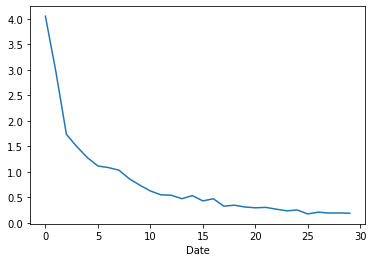

In [234]:
import matplotlib.pyplot as plt
plt.plot(range(0,len(dem_daysbefore_val)),dem_daysbefore_val)
plt.xlabel('Date')
plt.show()

In [229]:
sorted(val.days_before_departure.unique())

[0.0,
 1.0,
 2.0,
 3.0,
 4.0,
 5.0,
 6.0,
 7.0,
 8.0,
 9.0,
 10.0,
 11.0,
 12.0,
 13.0,
 14.0,
 15.000000000000002,
 16.0,
 17.0,
 18.0,
 19.0,
 20.0,
 21.0,
 22.0,
 23.0,
 24.0,
 25.0,
 26.0,
 27.0,
 28.0,
 29.0]